# Business Understanding

## Background
My company is looking to get into movie creation using their newly created movie studio. 

## Business Goals
The primary focus of this data science project is to analyze and assess features that contribute to a movie's return on investment in order to make an informed decision regarding what features of movie creation my company should invest in.

## Business Success Criteria
The success of this project will be measured by providing three well-supported recommendations on the most cost efficient movie features (actors, directots, genre, marketing cost, movie rating (G, PG, PG-13, etc.)) to invest in. For this project, the most "cost efficient" features are measured by their return on investment which is defined as 100% times the total revenue divided by the initial investment of the feature.

# Data Understanding

Data on movies is collected by a variety of different sources. For this project, I used data from the following sources:
- Box Office Mojo's "Movie Gross" dataset
    - This dataset includes 5 features and 3387 observations. Each entry in the dataset represents a different movie title. Additional information is included about each entry, such as the production studio, the domestic gross box office, the foreign gross box office, and the release year.
    
    
- Rotten Tomatoes "Movie Info" dataset
    - This dataset includes 12 features and 1560 observations/entries where each entry in the dataset represents a different movie. Even though the movie title is not included, each entry has an associated unique ID. Additional information is included about each entry, such as a synopsis, the movie rating, genre(s), director, writer, and runtime.
    
    
- Rotten Tomatoes "Movie Reviews" dataset
    - This dataset includes 8 features and 54432 observations/entries, where each entry in the dataset represents a different review left by a movie critic. Each entry contains an ID which refers to the movie the review is about. In addition to the review, other information for each entry includes a rating (out of 5), the critic's name, the publisher, and the date the review was left. 


- The Movie DB's "Movies" dataset
    - This dataset includes 10 features and 26517 observations. Each entry in the dataset represents a different movie. For each entry information is included about the movie's genre, original language, popularity score, and number of votes. 
    
    
- The Numbers' "movie_budgets" dataset
    - This dataset includes 6 features and 5782 observations. Each entry in the dataset represents a different movie. For each entry, information is included about the movie's release data, production budget, domestic gross box office, and worldwide gross box office.
    
    
- IMDB's film database
    - This database includes 8 tables. Its entity-related diagram (ERD) is shown below.  

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [4]:
# defining columns to format

budget_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']


In [5]:
# formatting budget columns by removing the $

for col in budget_cols:
     budgets[col] = budgets[col].str.replace('$', '')
        
        
# formatting budget columns by removing commas

for col in budget_cols:
     budgets[col] = budgets[col].str.replace(',', '')

In [6]:
# changing dtype of budget and gross columns to int

for col in budget_cols:
     budgets[col] = budgets[col].astype(float)

In [7]:
#converting dollar amounts to amounts that are easier to read

for col in budget_cols:
    budgets[col] = round(budgets[col]/1000000, 3)

In [8]:
# renaming columns to include dollar sign
budgets.rename(columns={'production_budget': 'production_budget (millions of $)', 'domestic_gross': 'domestic_gross (millions of $)', 'worldwide_gross' : 'worldwide_gross (millions of $)'}, inplace=True)


In [9]:
budgets.head()

,id,release_date,movie,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $)
0,1,"Dec 18, 2009",Avatar,425.0,760.508,2776.345
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.064,1045.664
2,3,"Jun 7, 2019",Dark Phoenix,350.0,42.762,149.762
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.006,1403.014
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181,1316.722


In [10]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 5782 non-null   int64  
 1   release_date                       5782 non-null   object 
 2   movie                              5782 non-null   object 
 3   production_budget (millions of $)  5782 non-null   float64
 4   domestic_gross (millions of $)     5782 non-null   float64
 5   worldwide_gross (millions of $)    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [11]:
# calculating the return on investment for each film and creating a column to hold this information

budgets['roi (%)'] = round(((budgets['domestic_gross (millions of $)'] + budgets['worldwide_gross (millions of $)'] - budgets['production_budget (millions of $)'])/ 
                budgets['production_budget (millions of $)']) * 100, 2)

In [12]:
budgets['id'].value_counts()

4      58
53     58
61     58
65     58
69     58
       ..
85     57
100    57
96     57
92     57
97     57
Name: id, Length: 100, dtype: int64

In [13]:
# inspecting all entries with id of '4'
budgets[budgets['id'] == 4].head(15)

,id,release_date,movie,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $),roi (%)
3,4,"May 1, 2015",Avengers: Age of Ultron,330.6,459.006,1403.014,463.22
103,4,"Mar 27, 2009",Monsters vs. Aliens,175.0,198.352,381.687,231.45
203,4,"Jul 15, 2016",Ghostbusters,144.0,128.351,229.009,148.17
303,4,"May 19, 1999",Star Wars Ep. I: The Phantom Menace,115.0,474.545,1027.045,1205.73
403,4,"Dec 14, 2018",Mortal Engines,100.0,15.951,85.287,1.24
503,4,"Sep 29, 2006",Open Season,85.0,85.105,191.932,225.93
603,4,"Dec 25, 1997",The Postman,80.0,17.651,20.841,-51.88
703,4,"Aug 8, 2003",S.W.A.T.,70.0,116.878,207.155,362.90
803,4,"Sep 14, 2012",Resident Evil: Retribution,65.0,42.346,240.648,335.38
903,4,"Jan 11, 2013",Gangster Squad,60.0,46.001,104.101,150.17


In [14]:
budgets.drop(['id'], axis=1, inplace=True)
budgets.head()

,release_date,movie,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $),roi (%)
0,"Dec 18, 2009",Avatar,425.0,760.508,2776.345,732.20
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.6,241.064,1045.664,213.38
2,"Jun 7, 2019",Dark Phoenix,350.0,42.762,149.762,-44.99
3,"May 1, 2015",Avengers: Age of Ultron,330.6,459.006,1403.014,463.22
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.0,620.181,1316.722,511.01


In [15]:
# checking for duplicate movie entries
budgets.movie.value_counts()

Halloween                3
King Kong                3
Home                     3
RoboCop                  2
Pet Sematary             2
                        ..
Teeth                    1
Life of the Party        1
Stranger Than Fiction    1
1776                     1
Crimson Tide             1
Name: movie, Length: 5698, dtype: int64

In [16]:
# checking to see if a movie with more than one entry if it is a duplicate entry or a remake

budgets[budgets['movie'] == 'Halloween']

,release_date,movie,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $),roi (%)
3014,"Aug 31, 2007",Halloween,15.000,58.269,77.514,805.22
3535,"Oct 19, 2018",Halloween,10.000,159.342,254.901,4042.43
5536,"Oct 17, 1978",Halloween,0.325,47.000,70.000,35900.00


In [17]:
# checking for any movie titles with more than one entry to see if it is a duplicate entry or a remake

multiple_values = budgets.movie.value_counts()
budgets[budgets.movie.isin(multiple_values.index[multiple_values.gt(1)])]

,release_date,movie,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $),roi (%)
26,"May 4, 2012",The Avengers,225.000,623.280,1517.936,851.65
38,"May 14, 2010",Robin Hood,210.000,105.487,322.459,103.78
39,"Dec 14, 2005",King Kong,207.000,218.080,550.517,271.30
50,"Mar 5, 2010",Alice in Wonderland,200.000,334.191,1025.491,579.84
64,"Jun 9, 2017",The Mummy,195.000,80.101,409.954,151.31
...,...,...,...,...,...,...
5668,"Nov 16, 1942",Cat People,0.134,4.000,8.000,8855.22
5676,"Oct 1, 1968",Night of the Living Dead,0.114,12.087,30.087,36894.74
5677,"Feb 8, 1915",The Birth of a Nation,0.110,10.000,11.000,18990.91
5699,"Aug 30, 1972",The Last House on the Left,0.087,3.100,3.100,7026.44


In [18]:
#setting up connection to database

conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [19]:
# creating a dataframe with a list of all tables in the database

db_tables = pd.read_sql("""

SELECT name
FROM sqlite_master
WHERE type = 'table';

""", conn)

db_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [20]:
movie_basics = pd.read_sql("""

SELECT * 
FROM movie_basics

""", conn)

movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [21]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [22]:
# get a count for the number of each genre
movie_basics['genres'].str.split(',').explode().value_counts()

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: genres, dtype: int64

In [23]:
# formatting genres column to create a list containing each genre for the film
movie_basics["genres"] = movie_basics["genres"].str.split(",")

In [24]:
# display number of nan values for each feature
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [25]:
# return the number of rows with nans in both genre and runtime
len(movie_basics.loc[movie_basics['genres'].isnull() & movie_basics['runtime_minutes'].isnull()])

3236

In [26]:
# removing rows from movie_basics with null genre and runtime
movie_basics_clean = movie_basics.drop(movie_basics.loc[movie_basics['genres'].isnull() & movie_basics['runtime_minutes'].isnull()].index)
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [27]:
# confirming that correct number of rows were filtered out
len(movie_basics) - len(movie_basics_clean)

3236

In [28]:
movie_basics_clean.isna().sum()

movie_id               0
primary_title          0
original_title         5
start_year             0
runtime_minutes    28503
genres              2172
dtype: int64

In [29]:
# checking to see the runtimes of movies
movie_basics_clean.runtime_minutes.value_counts().sort_values(ascending = False)

90.0      7131
80.0      3526
85.0      2915
100.0     2662
95.0      2549
          ... 
406.0        1
1184.0       1
263.0        1
363.0        1
540.0        1
Name: runtime_minutes, Length: 367, dtype: int64

In [30]:
# count number of movies less than 2 minutes long
len(movie_basics_clean[movie_basics_clean['runtime_minutes'] < 2])

17

In [31]:
movie_basics_clean[movie_basics_clean['runtime_minutes'] > 500]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
6311,tt1277455,A Time to Stir,A Time to Stir,2018,1320.0,[Documentary]
12974,tt1674154,City of Eternal Spring,City of Eternal Spring,2010,3450.0,"[Documentary, Drama, News]"
15381,tt1735956,Deregulation,Foreclose,2012,4200.0,"[Comedy, Drama]"
15796,tt1745901,How Does David Lynch Do It?,How Does David Lynch Do It?,2010,1800.0,[Mystery]
18210,tt1806770,American Fencer,American Fencer,2010,761.0,"[Biography, Documentary, Drama]"
18999,tt1823692,Hollywood East,Hollywood East,2010,1800.0,"[Documentary, History]"
20925,tt1866307,World Peace & Prayer Day,World Peace & Prayer Day,2011,2400.0,"[Documentary, Family]"
21545,tt1885195,Azgrab: The Documentary,Azgrab: The Documentary,2011,1669.0,"[Comedy, Sport]"
21816,tt1895288,A História de João e Zeca,A História de João e Zeca,2011,605.0,"[Action, Crime]"
22127,tt1910611,Saving Julian,Saving Julian,2012,840.0,[Drama]


In [32]:
directors = pd.read_sql("""

SELECT *
FROM directors

""", conn)

directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [33]:
directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [34]:
directors.value_counts()

movie_id   person_id
tt2249786  nm4630460    52
           nm1667641    52
           nm3952326    52
           nm3911770    52
           nm3863962    52
                        ..
tt3835080  nm0957772     1
tt3835110  nm7064225     1
tt7083156  nm1962933     1
tt3835134  nm7775933     1
tt4105968  nm1297226     1
Length: 163535, dtype: int64

In [35]:
# removes duplicate rows that share the same movie_id and person_id
director_duplicates = directors.duplicated(keep = False)
directors[director_duplicates]

,movie_id,person_id
2,tt0835418,nm0151540
3,tt0835418,nm0151540
8,tt0996958,nm2286991
9,tt0996958,nm2286991
10,tt0999913,nm0527109
...,...,...
291160,tt8992390,nm0504267
291161,tt8992390,nm0504267
291162,tt8992390,nm0504267
291167,tt8999892,nm10122247


In [36]:
directors_no_dups = directors.drop_duplicates()
directors_no_dups.value_counts()

movie_id   person_id
tt9916754  nm9272490    1
tt2861666  nm0813949    1
tt2862288  nm5196865    1
tt2862220  nm5642484    1
tt2862198  nm5140747    1
                       ..
tt5607934  nm5481490    1
tt5607916  nm8047651    1
           nm4194194    1
tt5607810  nm4160810    1
tt0063540  nm0712540    1
Length: 163535, dtype: int64

In [37]:
known_for = pd.read_sql("""

SELECT *
FROM known_for
""", conn)

known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [38]:
known_for.value_counts()

person_id  movie_id 
nm9993680  tt8295580    1
nm2101079  tt7547864    1
nm2101095  tt0490172    1
           tt5356300    1
nm2101106  tt0411272    1
                       ..
nm4852350  tt3605780    1
           tt5562254    1
nm4852353  tt2182099    1
           tt2203308    1
nm0000002  tt0037382    1
Length: 1638260, dtype: int64

In [39]:
persons = pd.read_sql("""

SELECT *
FROM persons
""", conn)

persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [40]:
# get a count for the number of each profession
persons['primary_profession'].str.split(',').explode().value_counts()

actor                        177838
producer                     150214
writer                       141504
director                     129808
actress                       95066
cinematographer               61984
editor                        55234
composer                      48823
camera_department             39466
miscellaneous                 38661
soundtrack                    20748
music_department              18568
assistant_director            15916
sound_department              15280
editorial_department          14565
production_manager             9768
art_department                 8913
production_designer            7592
visual_effects                 6188
art_director                   4623
stunts                         4309
casting_department             2802
executive                      2657
make_up_department             2613
animation_department           2459
casting_director               2397
location_management            2253
costume_department          

In [41]:
#persons.drop(['birth_year', 'death_year', 'primary_profession'], axis=1, inplace=True)

In [42]:
principals = pd.read_sql("""

SELECT *
FROM principals
""", conn)

principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [43]:
principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [44]:
principals['category'].value_counts()

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [45]:
principals['job'].value_counts()

producer                                     108168
screenplay                                     8172
director of photography                        6517
writer                                         6479
co-director                                    5796
                                              ...  
creator/writer                                    1
lead director of photography                      1
Based on a Story By                               1
based on: Historical tragedy by                   1
Based on short story "Bahiroloi Jowa Baat         1
Name: job, Length: 2965, dtype: int64

In [46]:
principals['characters'].value_counts()

["Himself"]                  43584
["Herself"]                  16127
["Narrator"]                  2218
["Alex"]                       656
["David"]                      620
                             ...  
["Boy Scout"]                    1
["Connor Atlas"]                 1
["Middle-aged Hou Liang"]        1
["Ryan Holmes"]                  1
["Jayne Norquist"]               1
Name: characters, Length: 174762, dtype: int64

In [47]:
# Dropping job and character columns 

principals.drop(['job', 'characters'], axis=1, inplace=True)

In [48]:
writers = pd.read_sql("""

SELECT *
FROM writers
""", conn)

writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [49]:
writers.value_counts()

movie_id   person_id
tt4050462  nm3601272    83
           nm5134804    83
           nm0340236    83
           nm0250080    83
           nm8337609    83
                        ..
tt5048688  nm6999080     1
tt5048612  nm7603072     1
           nm7603070     1
           nm7603067     1
tt0063540  nm0023551     1
Length: 178352, dtype: int64

In [50]:
# removes duplicate rows that share the same movie_id and person_id

writer_duplicates = writers.duplicated(keep = False)
writers_no_dups = writers.drop_duplicates()

In [51]:
#movie_db_info = pd.read_sql("""

#SELECT  DISTINCT movie_id, primary_title, original_title, start_year, runtime_minutes, averagerating, numvotes, primary_name, primary_profession, genres
#FROM movie_basics
#JOIN movie_ratings
 #   USING(movie_id)
#JOIN directors
 #   USING(movie_id)
#JOIN persons
 #   USING(person_id)

#""", conn)

#movie_db_info.info()

In [52]:
#movie_db_info.head()

In [53]:
#movie_db_info.original_title.value_counts()

In [54]:
#multiple_values_db = movie_db_info.primary_title.value_counts()
#movie_db_info[movie_db_info.primary_title.isin(multiple_values_db.index[multiple_values_db.gt(10)])]

In [55]:
#movie_db_info.primary_title.value_counts()

In [56]:
#movie_db_info.isna().sum()

In [57]:
#round(movie_db_info.isnull().mean()*100,2) 

In [58]:
#import seaborn as sns
#sns.histplot(movie_db_info['runtime_minutes']);

In [59]:
# Trying to merge budget df with database df
# pd.merge(movie_db_info, budgets, left_on='primary_title', right_on='movie', how='inner')

# Exploratory Data Analysis

In [71]:
budgets.describe()

,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $),roi (%)
count,5782.000000,5782.000000,5782.000000,5782.000000
mean,31.587757,41.873327,91.487460,678.944737
std,41.812077,68.240598,174.719971,5495.710322
min,0.001000,0.000000,0.000000,-100.000000
25%,5.000000,1.429250,4.125250,-20.285000
50%,17.000000,17.226000,27.984000,165.945000
75%,40.000000,52.349000,97.646250,489.315000
max,425.000000,936.662000,2776.345000,359900.000000


/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


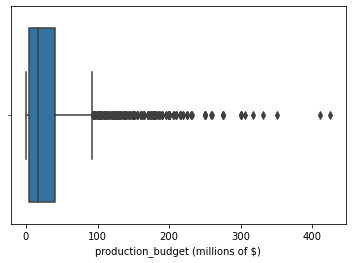

In [75]:
sns.boxplot(budgets['production_budget (millions of $)']);

In [92]:
budgets[(budgets['roi (%)'] > 0.1) & (budgets['roi (%)']< 100000)]

,release_date,movie,production_budget (millions of $),domestic_gross (millions of $),worldwide_gross (millions of $),roi (%)
0,"Dec 18, 2009",Avatar,425.000,760.508,2776.345,732.20
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410.600,241.064,1045.664,213.38
3,"May 1, 2015",Avengers: Age of Ultron,330.600,459.006,1403.014,463.22
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317.000,620.181,1316.722,511.01
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306.000,936.662,2053.311,877.12
...,...,...,...,...,...,...
5773,"Feb 26, 1993",El Mariachi,0.007,2.041,2.042,58228.57
5774,"Oct 8, 2004",Primer,0.007,0.425,0.842,18000.00
5775,"May 26, 2006",Cavite,0.007,0.070,0.072,1928.57
5778,"Apr 2, 1999",Following,0.006,0.048,0.240,4700.00


In [ ]:
sns.scatterplot(data = budgets, x = 'production_budget (millions of $)', y = (budgets['roi (%)'] > 0.1) & (budgets['roi (%)']< 100000))
plt.yticks(np.arange(budgets['roi (%)'].min(),budgets['roi (%)'].max() , 10));

In [60]:
# calculating the mean roi
budgets['roi (%)'].mean()

678.944737115185

In [61]:
# calculating the median roi
budgets['roi (%)'].median()

165.945

In [62]:
# returning the movies in the top 25% of roi
top_25_percent_roi = list(budgets[budgets['roi (%)'] > budgets['roi (%)'].quantile(.75)].sort_values(by = ['roi (%)'], ascending = False)['movie'])

In [63]:
top_roi_movie_basics = movie_basics[movie_basics['primary_title'].isin(top_25_percent_roi)]
top_roi_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
33,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,"[Action, Adventure, Fantasy]"
40,tt0326592,The Overnight,The Overnight,2010,88.0,None
60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]"
97,tt0431021,The Possession,The Possession,2012,92.0,"[Horror, Mystery, Thriller]"
104,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"[Adventure, Animation, Comedy]"


In [64]:
# getting summary statistics for the movies in the top 25% of roi
top_roi_movie_basics.describe()

,start_year,runtime_minutes
count,836.000000,741.000000
mean,2014.442584,98.298246
std,2.693582,28.132195
min,2010.000000,3.000000
25%,2012.000000,86.000000
50%,2014.000000,99.000000
75%,2017.000000,114.000000
max,2021.000000,312.000000


In [65]:
top_genres_count = top_roi_movie_basics['genres'].explode().value_counts()
top_genres = list(top_genres_count.index)
top_genres

['Drama',
 'Comedy',
 'Horror',
 'Thriller',
 'Action',
 'Documentary',
 'Romance',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Biography',
 'Crime',
 'Family',
 'Animation',
 'Fantasy',
 'Music',
 'History',
 'Musical',
 'Sport',
 'War',
 'Western']

In [70]:
round(top_roi_movie_basics['genres'].explode().value_counts(normalize = True), 3)

Drama          0.223
Comedy         0.118
Horror         0.074
Thriller       0.072
Action         0.067
Documentary    0.059
Romance        0.056
Adventure      0.056
Mystery        0.046
Sci-Fi         0.035
Biography      0.035
Crime          0.033
Family         0.027
Animation      0.026
Fantasy        0.026
Music          0.014
History        0.011
Musical        0.007
Sport          0.007
War            0.004
Western        0.002
Name: genres, dtype: float64

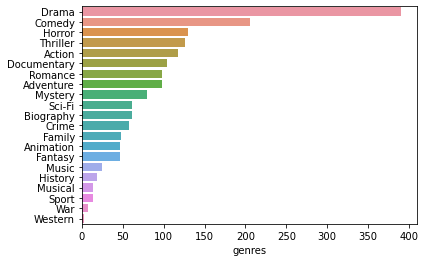

In [67]:
# horizontal bar plot showing the counts of genres for highest roi movies
sns.barplot(y = top_genres, x = top_genres_count);


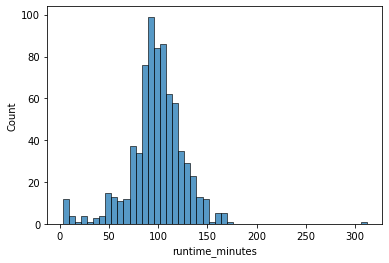

In [68]:
sns.histplot(top_roi_movie_basics['runtime_minutes']);

/Users/chriskucewicz/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


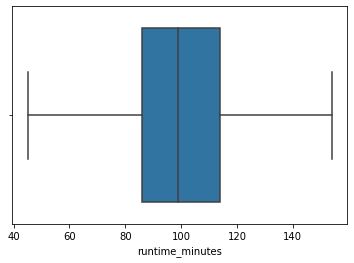

In [79]:
sns.boxplot(top_roi_movie_basics['runtime_minutes'], showfliers = False);

In [ ]:
# plotting roi histogram without outliers
mean = budgets['roi (%)'].mean()
stan_dev = budgets['roi (%)'].std()

outliers_threshold = 3 * stan_dev

hist_no_outliers = budgets[(budgets['roi (%)'] > (mean - outliers_threshold)) & (budgets['roi (%)'] < (mean + outliers_threshold))]

hist_no_outliers['roi (%)'].hist(bins=30, color='goldenrod', edgecolor='black');

In [ ]:
# plotting runtime histogram without outliers
runtime_mean = movie_basics_clean['runtime_minutes'].mean()
runtime_stan_dev = movie_basics_clean['runtime_minutes'].std()

outliers_threshold = 1 * runtime_stan_dev

runtime_hist_no_outliers = movie_basics_clean[(movie_basics_clean['runtime_minutes'] > (runtime_mean - outliers_threshold)) & (movie_basics_clean['runtime_minutes'] < (runtime_mean + outliers_threshold))]

runtime_hist_no_outliers['runtime_minutes'].hist(bins=30, color='goldenrod', edgecolor='black');

In [ ]:
sns.histplot(runtime_hist_no_outliers['runtime_minutes'], bins = 30);

In [ ]:
budgets[budgets['production_budget (millions of $)'] < 0.002].sort_values(by = ['production_budget (millions of $)'], ascending = False)

In [ ]:
budgets.head()

In [ ]:
budgets[budgets['roi (%)'] > 50].sort_values(by = ['roi (%)'], ascending = True)

In [ ]:
# defining names of movies with highest roi
top_4000_roi = budgets.sort_values(by = ['roi (%)'], ascending = True).head(4000)['movie']

In [ ]:
# Listing all movies from budgets df with a roi greater than 10%
budgets[budgets['roi (%)'] > 10]['movie']

In [ ]:
budgets.to_csv('budgets_roi.csv', index=False) 

In [ ]:
movie_basics[movie_basics['primary_title'].isin(top_4000_roi)]

In [ ]:
movie_basics[movie_basics['original_title'].isin(top_4000_roi)]

# Conclusion
 
## Limitations

## Recommendations

## Next Steps

# Resources

- got error when trying to read in reviews.tsv dataset: "UnicodeDecodeError: 'utf8' codec can't decode byte 0xa5 in position 0: invalid start byte". This resource helped: https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s

- Had trouble reading zipped data with pandas. This helped me with reading in the csv and tsv data: https://stackoverflow.com/questions/18885175/read-a-zipped-file-as-a-pandas-dataframe

- for joining datasets: https://stackoverflow.com/questions/53645882/pandas-merging-101

- the movie_info dataset had the word 'minutes' in each entry for runtime. Just wanted the numbers. this was helpful:
https://saturncloud.io/blog/how-to-remove-characters-from-a-pandas-column-a-data-scientists-guide/

- merging on more than one condition: https://stackoverflow.com/questions/53549492/joining-two-pandas-dataframes-based-on-multiple-conditions

- dropping nulls in certain columns: https://saturncloud.io/blog/how-to-delete-rows-with-null-values-in-a-specific-column-in-pandas-dataframe/#:~:text=Deleting%20rows%20with%20null%20values%20in%20a%20specific%20column%20can,values%20in%20the%20specified%20column.&text=df%20is%20the%20Pandas%20DataFrame%20that%20you%20want%20to%20modify.

- for subsetting dataframe to only show entries with value count more than one https://stackoverflow.com/questions/48628417/how-to-select-rows-in-pandas-dataframe-where-value-appears-more-than-once

- Finding rows with matching entries: https://stackoverflow.com/questions/22485375/efficiently-select-rows-that-match-one-of-several-values-in-pandas-dataframe

For trying to split the genres column into new columns: 
- https://saturncloud.io/blog/how-to-split-one-column-into-multiple-columns-in-pandas-dataframe/#:~:text=Using%20the%20pd.&text=Series.-,str.,list%20as%20a%20new%20column.

- https://www.reddit.com/r/learnpython/comments/krasnw/how_to_put_my_genres_in_their_own_df_with_their/

For multi-indexing / using a pivot table to group people by the movies they've been in:
- https://www.datacamp.com/tutorial/pandas-multi-index
- https://stackoverflow.com/questions/35414625/pandas-how-to-run-a-pivot-with-a-multi-index
- https://stackoverflow.com/questions/61623982/python-pandas-grouping-columns-without-aggregating

https://www.reddit.com/r/SQL/comments/15z6ee7/cleaning_before_joining/

return rows in the top x% of a given column: 
- https://stackoverflow.com/questions/52876391/pandas-based-on-top-x-value-of-each-column-mark-as-new-number

For creating a dictionary that lists the number of rows for each table: 
- https://stackoverflow.com/questions/71432838/for-loop-to-create-a-dataframe-using-pandas-read-sql-in-python